<a href="https://colab.research.google.com/github/ssd123456789/Machine-Learning/blob/main/Pandas_Practice_10_02_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=sns.load_dataset("iris")

In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
list[df.columns]

list[Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')]

<Axes: xlabel='species', ylabel='sepal_length'>

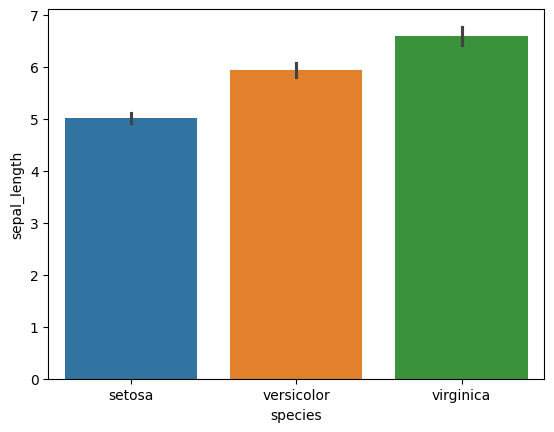

In [ ]:
sns.barplot(y = 'sepal_length',
            x = 'species',
        data = df, hue="species")

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

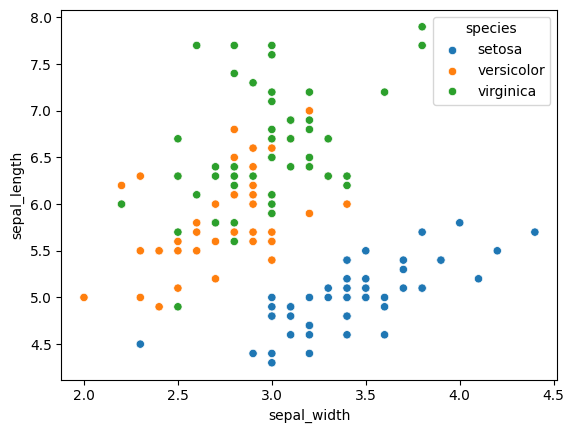

In [ ]:
sns.scatterplot(y = 'sepal_length',
x = 'sepal_width',data = df, hue="species")

In [ ]:
df.rename(columns={'species': 'Species'}, inplace=True)

In [ ]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df.groupby(['Species']).agg({"sepal_length":"sum","sepal_width":"max"})

,sepal_length,sepal_width
Species,,
setosa,250.3,4.4
versicolor,296.8,3.4
virginica,329.4,3.8


In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


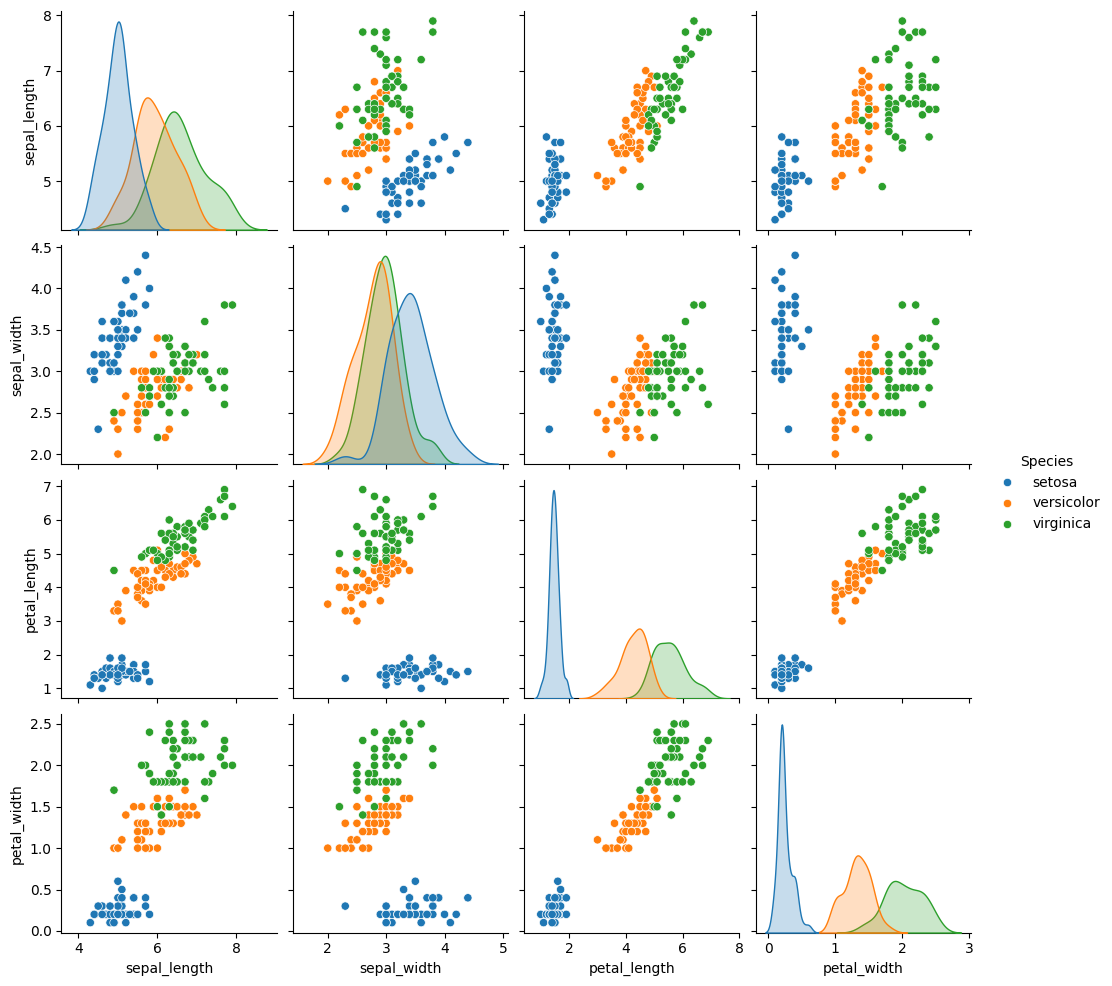

In [ ]:
sns.pairplot(df, hue='Species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

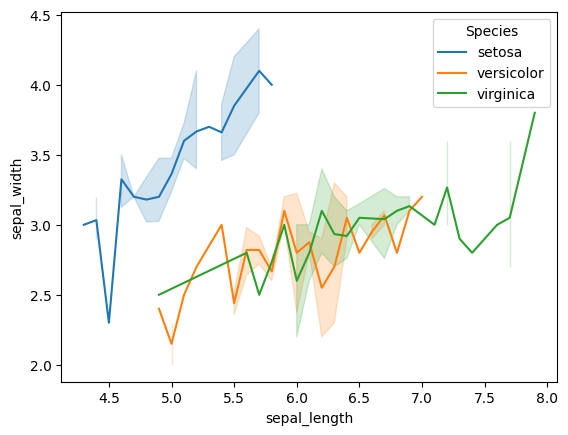

In [ ]:
sns.lineplot(x="sepal_length", y="sepal_width", data=df,  hue='Species')

#The main difference between a pivot and a pivot table is that a pivot table provides additional functionality, such as the ability to calculate subtotals and grand totals. Additionally, pivot tables can be used to create more complex data summaries, such as calculating. while melt function unpivots the data

In [ ]:
 #Create a DataFrame with a non-unique index
df1 = pd.DataFrame({
    "index": [1, 1, 2, 3, 3],
    "x": ["a", "b", "c", "d", "e"],
    "y": [10, 20, 30, 40, 50]
})
df1

,index,x,y
0,1,a,10
1,1,b,20
2,2,c,30
3,3,d,40
4,3,e,50


In [ ]:
df_pivot_table = df1.pivot_table(index="index",  values="y", columns='x', aggfunc='sum')
df_pivot_table

x,a,b,c,d,e
index,,,,,
1,10.0,20.0,NaN,NaN,NaN
2,NaN,NaN,30.0,NaN,NaN
3,NaN,NaN,NaN,40.0,50.0


In [ ]:
df_pivot = df1.pivot(index="index", columns="x", values="y")
df_pivot

x,a,b,c,d,e
index,,,,,
1,10.0,20.0,NaN,NaN,NaN
2,NaN,NaN,30.0,NaN,NaN
3,NaN,NaN,NaN,40.0,50.0


#In summary, both have same arguments. choose pivot() for simple reshaping and pivot_table() for more complex scenarios! 🐼📊

pivot() is best used when you have a simple one-to-one relationship between the index and columns of your DataFrame

In [ ]:
df_pivot_table=df_pivot_table.reset_index()

In [ ]:
df_pivot_table

x,index,a,b,c,d,e
0,1,10.0,20.0,NaN,NaN,NaN
1,2,NaN,NaN,30.0,NaN,NaN
2,3,NaN,NaN,NaN,40.0,50.0


In [ ]:
melted_df = pd.melt(df_pivot_table, id_vars=['index','a']) #id_vars:unchanged columns for unpivoting/ no agg
melted_df

,index,a,x,value
0,1,10.0,b,20.0
1,2,NaN,b,NaN
2,3,NaN,b,NaN
3,1,10.0,c,NaN
4,2,NaN,c,30.0
5,3,NaN,c,NaN
6,1,10.0,d,NaN
7,2,NaN,d,NaN
8,3,NaN,d,40.0
9,1,10.0,e,NaN


frame: The DataFrame to be melted.
**id_vars: Column(s) to use as identifier variables (columns that remain unchanged).**
value_vars: Column(s) to unpivot (columns that will be melted).
var_name: Name to use for the ‘variable’ column (default is ‘variable’).
value_name: Name to use for the ‘value’ column (default is ‘value’).

**UNPIVOT data: wide (No duplicates in first column) to long(duplicates in first column)**

In [ ]:
df[df.petal_length>1]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df[df.Species=='virginica']

,sepal_length,sepal_width,petal_length,petal_width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [ ]:
df[(df.sepal_length <1) & (df.petal_length >1) ]

,sepal_length,sepal_width,petal_length,petal_width,Species


In [ ]:
df[(df.sepal_length <1) | (df.petal_length >1)]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df[df.Species.isin(["virginica"])]

,sepal_length,sepal_width,petal_length,petal_width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [ ]:
df[df.Species.str.contains("s")]


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [ ]:
df[df.Species.str.startswith("s")]
df[df.Species.str.endswith("s")]

,sepal_length,sepal_width,petal_length,petal_width,Species


In [ ]:
df[~df.Species.str.endswith("s")]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.query('sepal_length == 1 and petal_length > 0.5') #string

,sepal_length,sepal_width,petal_length,petal_width,Species


In [ ]:
df.iloc[:,-1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.duplicated().sum()

1

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [ ]:
df.fillna(10)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    object 
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [ ]:
df.sepal_length=df.sepal_length.astype("int")

In [ ]:
df.sepal_length=df.sepal_length.astype("str")

In [ ]:
cross_tab = pd.crosstab(index=df["species"], columns=['sepal_length'])

print(cross_tab)

col_0       sepal_length
species                 
setosa                50
versicolor            50
virginica             50


In [ ]:
len(df)

150

In [ ]:
df.species.dtype

dtype('O')

In [ ]:
df['sepal_length'].cumsum()

0                                                      5
1                                                     54
2                                                    544
3                                                   5444
4                                                  54445
                             ...                        
145    5444554544544455555555454555544555455445544554...
146    5444554544544455555555454555544555455445544554...
147    5444554544544455555555454555544555455445544554...
148    5444554544544455555555454555544555455445544554...
149    5444554544544455555555454555544555455445544554...
Name: sepal_length, Length: 150, dtype: object

In [ ]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7,3.0,6.1,2.3,virginica
53,5,2.3,4.0,1.3,versicolor


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6,3.0,5.2,2.3,virginica
146,6,2.5,5.0,1.9,virginica
147,6,3.0,5.2,2.0,virginica
148,6,3.4,5.4,2.3,virginica
149,5,3.0,5.1,1.8,virginica


**Similar as np.where: Filter and manipulate** The df.where() function in Pandas is used to filter a DataFrame based on a condition and replace the missing values with a specified value. It takes two arguments:

condition: The condition to filter the DataFrame by.
other: The value to replace the missing values with.

In [ ]:
filtered_data = df.species.where(df["species"] == "virginica", other=0)

# Print the filtered data
print(filtered_data)

0              0
1              0
2              0
3              0
4              0
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.species.nunique()

3

In [ ]:
df['ranspeciesk_calc'] = df["species"].rank()

In [ ]:
df['ranspeciesk_calc'].unique()

array([ 25.5,  75.5, 125.5])

In [ ]:
df.species.replace("virginica", "Virginica")

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: species, Length: 150, dtype: object

In [ ]:
df.rename(columns = {"species": "Species"})

,sepal_length,sepal_width,petal_length,petal_width,Species,ranspeciesk_calc
0,5,3.5,1.4,0.2,setosa,25.5
1,4,3.0,1.4,0.2,setosa,25.5
2,4,3.2,1.3,0.2,setosa,25.5
3,4,3.1,1.5,0.2,setosa,25.5
4,5,3.6,1.4,0.2,setosa,25.5
...,...,...,...,...,...,...
145,6,3.0,5.2,2.3,virginica,125.5
146,6,2.5,5.0,1.9,virginica,125.5
147,6,3.0,5.2,2.0,virginica,125.5
148,6,3.4,5.4,2.3,virginica,125.5


In [ ]:
pd.qcut(df['petal_length'], q = 5)

0      (0.999, 1.5]
1      (0.999, 1.5]
2      (0.999, 1.5]
3      (0.999, 1.5]
4      (0.999, 1.5]
           ...     
145    (4.64, 5.32]
146    (4.64, 5.32]
147    (4.64, 5.32]
148     (5.32, 6.9]
149    (4.64, 5.32]
Name: petal_length, Length: 150, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.5] < (1.5, 3.9] < (3.9, 4.64] < (4.64, 5.32] <
                                           (5.32, 6.9]]

In [ ]:
pd.cut(df['petal_length'], bins = 5).value_counts()

(0.994, 2.18]    50
(4.54, 5.72]     47
(3.36, 4.54]     34
(5.72, 6.9]      16
(2.18, 3.36]      3
Name: petal_length, dtype: int64

In [ ]:
df1 = pd.DataFrame({"city": ['A', 'B', 'C'],
                   "day1": [22, 25, 21],
                   'day2':[31, 12, 67],
                   'day3': [27, 20, 15],
                   'day4': [34, 37, [41, 45, 67, 90, 21]],
                   'day5': [23, 54, 36]})
df1

,city,day1,day2,day3,day4,day5
0,A,22,31,27,34,23
1,B,25,12,20,37,54
2,C,21,67,15,"[41, 45, 67, 90, 21]",36


In [ ]:
df1.explode('day4').reset_index(drop=True) #explode

,city,day1,day2,day3,day4,day5
0,A,22,31,27,34,23
1,B,25,12,20,37,54
2,C,21,67,15,41,36
3,C,21,67,15,45,36
4,C,21,67,15,67,36
5,C,21,67,15,90,36
6,C,21,67,15,21,36


In [ ]:
import requests

In [ ]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=1')

In [ ]:
temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]

In [ ]:
temp_df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,112.925,8.700,25513
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,120.375,8.707,19410
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,77.644,8.591,11708
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,63.737,8.572,15089
4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,49.638,8.549,8013


In [ ]:
temp_df.shape

(20, 7)

In [ ]:
for i in range(1,429):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page={}'.format(i))
    temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]
    df = df.append(temp_df,ignore_index=True)

In [ ]:
df.to_csv("1.csv")

In [ ]:
df.shape

(8710, 13)

In [ ]:
pd.read_json('https://api.exchangerate-api.com/v4/latest/INR')

,provider,WARNING_UPGRADE_TO_V6,terms,base,date,time_last_updated,rates
AED,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,0.0442
AFN,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,0.8900
ALL,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,1.1700
AMD,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,4.8700
ANG,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,0.0216
...,...,...,...,...,...,...,...
XPF,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,1.3300
YER,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,3.0200
ZAR,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,0.2290
ZMW,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2024-02-11,1707609601,0.3250
